# Part 1

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline

In [57]:
#Loading data and running basic overview of data

df_users = pd.read_csv("csv/Users.csv")
df_users

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,WebsiteUrl,ProfileImageUrl
0,-1,3,2010-11-11T17:29:16.000,Community,2010-11-11T17:29:21.870,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",145,135,11,-1,NaN,NaN
1,2,101,2010-11-11T21:14:59.000,Geoff Dalgas,2015-08-20T17:47:13.240,"Corvallis, OR",<p>Developer on the Stack Overflow team. Find...,6,2,0,2,http://stackoverflow.com,https://i.stack.imgur.com/nDllk.png
2,3,1017,2010-11-11T21:24:20.000,rem,2011-07-12T17:47:27.143,NaN,NaN,2,0,0,68456,NaN,NaN
3,4,727,2010-11-11T21:24:33.000,garik,2011-12-12T08:31:46.870,Russia,<p></p>\n,4,0,0,61635,http://www.igorbaranov.ru,NaN
4,5,720,2010-11-11T21:25:25.000,Magnus,2011-02-12T13:32:13.880,"Glasgow, United Kingdom",<p>I am a undergraduate student studying for a...,3,0,0,209674,http://www.magnusmorton.com,NaN
5,6,101,2010-11-11T21:25:29.000,Emmett,2012-06-12T17:23:55.233,"San Francisco, CA","<p>co-founder of <a href=""https://airtable.com...",1,0,0,1998,http://minesweeperonline.com,https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1
6,7,800,2010-11-11T21:26:08.000,M.S. Dousti,2012-11-23T18:04:58.770,"Tehran, Iran","<p>I got my Ph.D. from <a href=""http://www.sha...",0,0,0,208719,http://ce.sharif.edu/~dousti,NaN
7,8,153,2010-11-11T21:26:30.000,Van Gale,2011-09-22T10:54:48.277,"Denver, CO",<p>I'm a Python developer with over 30 years o...,0,0,0,15955,http://agile.st,NaN
8,9,119,2010-11-11T21:26:56.000,vvucetic,2010-11-11T21:34:17.767,localhost,<p>Developer.</p>\n,2,0,0,433523,NaN,NaN
9,11,534,2010-11-11T21:29:09.000,Eugen Constantin Dinca,2016-07-26T00:12:18.340,"New York, United States",NaN,0,5,0,51486,http://decbis.tumblr.com/,NaN


In [58]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12267 entries, 0 to 12266
Data columns (total 13 columns):
Id                 12267 non-null int64
Reputation         12267 non-null int64
CreationDate       12267 non-null object
DisplayName        12265 non-null object
LastAccessDate     12267 non-null object
Location           6584 non-null object
AboutMe            6245 non-null object
Views              12267 non-null int64
UpVotes            12267 non-null int64
DownVotes          12267 non-null int64
AccountId          12267 non-null int64
WebsiteUrl         4098 non-null object
ProfileImageUrl    7649 non-null object
dtypes: int64(6), object(7)
memory usage: 1.2+ MB


In [59]:
df_users.describe()

,Id,Reputation,Views,UpVotes,DownVotes,AccountId
count,12267.000000,12267.000000,12267.000000,12267.000000,12267.000000,1.226700e+04
mean,67080.328850,448.762371,0.911388,1.271134,0.090405,3.159758e+06
std,51321.324515,3766.191498,12.639061,17.131050,1.871999,3.370762e+06
min,-1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000e+00
25%,20587.500000,101.000000,0.000000,0.000000,0.000000,3.385960e+05
50%,56615.000000,101.000000,0.000000,0.000000,0.000000,1.916595e+06
75%,105896.500000,175.000000,0.000000,0.000000,0.000000,4.964102e+06
max,179377.000000,272521.000000,890.000000,919.000000,107.000000,1.368165e+07


In [60]:
df_users.columns

Index(['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate',
       'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId',
       'WebsiteUrl', 'ProfileImageUrl'],
      dtype='object')

In [61]:
#attempting to format date
creation_date = pd.to_datetime(df_users['CreationDate'])

In [62]:
#new_date =  pd.to_datetime(df_users['CreationDate'].dt.strftime('%Y-%m'))

In [76]:
df_users['CreationDate'].dtypes

dtype('O')

In [65]:
#Creating x and y axis for scatter plot
x_axis = creation_date
y_axis = df_users['Reputation']

Text(0, 0.5, 'Reputation')

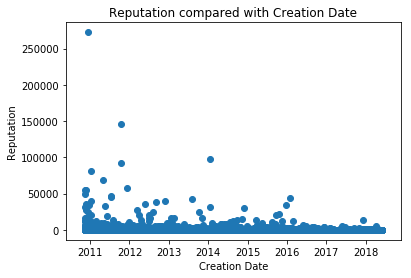

In [82]:
#creating basic visualization and looking to see what distribution looks like for creation date and last accessed date

creation_date = plt.scatter(x_axis, y_axis, marker="o", alpha = 1.0)
plt.title("Reputation compared with Creation Date")
plt.xlabel("Creation Date")
plt.ylabel("Reputation")

In [67]:
last_access = df_users['LastAccessDate']

#access_date = pd.to_datetime(df_users['LastAccessDate'])

Text(0, 0.5, 'Reputation')

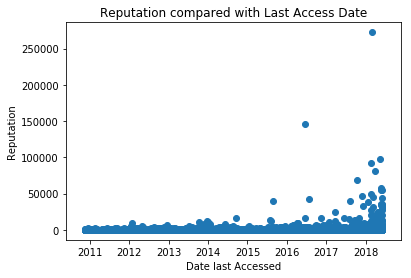

In [81]:
last_access_date = plt.scatter(access_date, y_axis, marker="o", alpha = 1.0)
plt.title("Reputation compared with Last Access Date")
plt.xlabel("Date last Accessed")
plt.ylabel("Reputation")

A quick obeservation concerning these visulaizations is that I feel strongly that I can assume your reputation will increase with frequency of access to the acoucnt/using the platform. Therefore, I would conclude from the comparison of reuptation and last accessed date, that recent usage and more frequent usage can impact reputation positively. 

# Part 2

In [69]:
#checking to see if reputation is dependent upon location. 
#Because of time restrictions I will stick to time as the indepndent variable.

(df_users['Location']).unique
(df_users['Location']).count

(df_users['Location']).dropna(how='any')

0                           on the server farm
1                                Corvallis, OR
3                                       Russia
4                      Glasgow, United Kingdom
5                            San Francisco, CA
6                                 Tehran, Iran
7                                   Denver, CO
8                                    localhost
9                      New York, United States
10                               Charlotte, NC
13                            Cologne, Germany
14                                   Australia
15                                    Colorado
16                                    Nerdvana
17             Espoo, Southern Finland Finland
18                        Texas, United States
20                       Florianópolis, Brazil
22                                      Israel
24                    Scotland, United Kingdom
25                                New York, NY
26                                       Italy
27           

In [97]:
#checking the correlation of variables
df_users.corr()

,Id,Reputation,Views,UpVotes,DownVotes,AccountId
Id,1.000000,-0.075651,-0.057647,-0.051649,-0.038795,0.740944
Reputation,-0.075651,1.000000,0.489597,0.358990,0.325091,-0.046248
Views,-0.057647,0.489597,1.000000,0.668030,0.630790,-0.035169
UpVotes,-0.051649,0.358990,0.668030,1.000000,0.892074,-0.029615
DownVotes,-0.038795,0.325091,0.630790,0.892074,1.000000,-0.021651
AccountId,0.740944,-0.046248,-0.035169,-0.029615,-0.021651,1.000000


In [98]:
#Creating a linear regression model

X = df_users[['Views', 'UpVotes', 'DownVotes']]
Y = df_users[['Reputation']]

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [100]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
predictions = lm.predict(X_test)

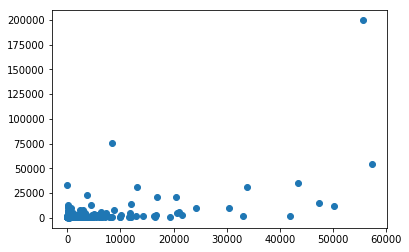

In [96]:
plt.scatter(Y_test,predictions)

# Part 3

In [108]:
comments = df_users['AboutMe'].dropna(how=any)

comments.head(35)

0     <p>Hi, I'm not really a person.</p>\n\n<p>I'm ...
1     <p>Developer on the Stack Overflow team.  Find...
3                                             <p></p>\n
4     <p>I am a undergraduate student studying for a...
5     <p>co-founder of <a href="https://airtable.com...
6     <p>I got my Ph.D. from <a href="http://www.sha...
7     <p>I'm a Python developer with over 30 years o...
8                                   <p>Developer.</p>\n
10    <p>I'm a consultant at Microsoft specializing ...
13       Software architect, developer and bass player.
15    <p>I play offensive security professionally an...
16     <p>...I put on my robe and a wizard hat...</p>\n
17    <p>Currently working as <a href="http://users....
18    <p>Computer science student. Interested in net...
19    <p>Pain in the neck. Microsoft Security PM.</p>\n
20    <p>I have been working with C for 10+ years an...
22    <p>Security expert and experienced Windows pro...
24    <p>I'm an IT Security professional based i

Categorizing Cooments:

I would break these comments down into the following categories

1. Student
2. New to Coding
3. Professional
4. Proifesisonal with extensive experience
